In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pyod.models.iforest import IForest
import numpy as np
from sklearn.metrics import classification_report
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from sklearn.metrics import accuracy_score
from pyod.models.pca import PCA
from pyod.models.mcd import MCD

import warnings
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import evaluate_print
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats import ConstantInputWarning

warnings.simplefilter("ignore", ConstantInputWarning)


In [ ]:
df=pd.read_csv("/content/cleaned.csv")

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
mean_value = df['value'].mean()
std_dev_value = df['value'].std()

In [ ]:
threshold_upper = mean_value + (1.25 * std_dev_value)
threshold_lower = mean_value -( 3 * std_dev_value)

In [ ]:
def label_anomalies(value):
    if value > threshold_upper or value < threshold_lower:
        return 1
    else:
        return 0



In [ ]:
df['true_labels'] = df['value'].apply(label_anomalies)


In [ ]:
df["true_labels"].value_counts()

true_labels
0    22042
1      653
Name: count, dtype: int64

In [ ]:
scaler = StandardScaler()
X = df[['value']].values
X_scaled = scaler.fit_transform(X)
X=X_scaled

In [ ]:
clf_ae = AutoEncoder(hidden_neuron_list=[8, 4, 4, 8], epoch_num=50, batch_size=32, contamination=0.1)


In [ ]:
clf_ae.fit(X_scaled)

Training: 100%|██████████| 50/50 [04:38<00:00,  5.56s/it]


In [ ]:
y_predict_ae = clf_ae.predict(X_scaled)
y_scores_ae = clf_ae.decision_scores_

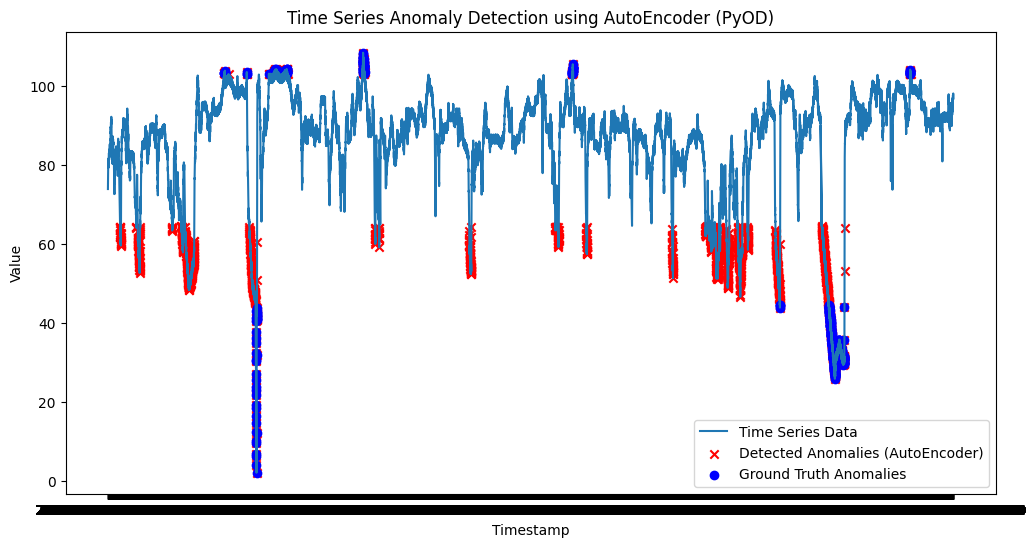

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')
plt.scatter(df['timestamp'][y_predict_ae == 1], df['value'][y_predict_ae == 1],
            color='red', marker='x', label='Detected Anomalies (AutoEncoder)')
plt.scatter(df['timestamp'][df['true_labels'] == 1], df['value'][df['true_labels'] == 1],
            color='blue', marker='o', label='Ground Truth Anomalies')
plt.title('Time Series Anomaly Detection using AutoEncoder (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
print(classification_report(df['true_labels'], y_predict_ae))
accuracy = accuracy_score(df['true_labels'], y_predict_ae)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     22042
           1       0.29      1.00      0.45       653

    accuracy                           0.93     22695
   macro avg       0.64      0.96      0.70     22695
weighted avg       0.98      0.93      0.95     22695



In [ ]:
accuracy*100

92.87508261731658